# Programmieraufgaben zu 3.4 (Hierarchical Clustering)

---

## Programmieraufgabe 

Sei ein Datensatz $E$ gegeben durch

$$
E=\{(11, 0.8), (11.6, 1), (9.2, 0.9), (14.1, 0.8), (13.4, 0.9), (8.8, 1.1), (12.2, 0.8)\}
$$

Nutzen Sie Python und scikit-learn, um die folgenden Aufgaben zu bearbeiten.

**Aufgaben**:

1. Nutzen Sie einen `EllipticEnvelope`, um zu bestimmen, ob der Punkt $x_{(8)} = (13.9, 1.1)$ ein Ausreißer ist.
2. Visualisieren Sie den Datensatz $E$, inklusive des Punktes $x_{(8)}$ und der Entscheidungsgrenze, die in der vorherigen Aufgabe bestimmt wurde.

In [71]:
from sklearn.covariance import EllipticEnvelope

E = [
    (11, 0.8),
    (11.6, 1),
    (9.2, 0.9),
    (14.1, 0.8),
    (13.4, 0.9),
    (8.8, 1.1),
    (12.2, 0.8),
]

x_8 = (13.9, 1.1)

model = EllipticEnvelope(contamination=1e-100).fit(E)


print(f"x_8 is abnormal: {model.predict([x_8])[0] == -1}")

model.predict(E)

x_8 is abnormal: True


array([1, 1, 1, 1, 1, 1, 1])

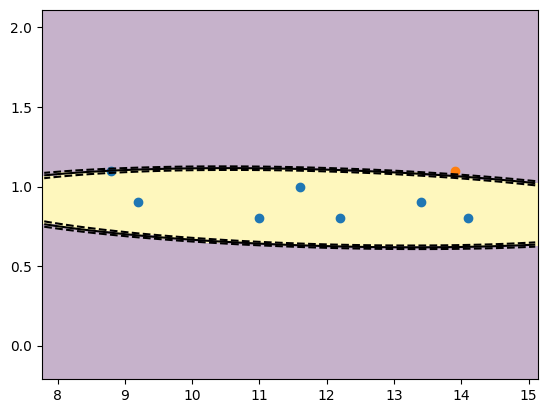

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay


def plot_decision_boundary(model, data: list, additional_points: list):
    _, ax = plt.subplots()
    common_params = {"estimator": model, "X": np.array(data), "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )

    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )
    plt.scatter(*zip(*data))
    plt.scatter(*additional_points)

    plt.show()


plot_decision_boundary(model, E, x_8)